In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.svm import SVC     ### SVM for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

import random
import numpy as np
import math
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 

In [16]:
from sklearn.tree import export_text

from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from datetime import datetime

In [17]:
def indexOf(arr, e):
    for i in arr:
        if (e==i):
            return arr.index(e)
    return -1; 

In [24]:
def getRandomByPercent(percent, total):
    rArr = [0]
    length= int(percent/100*total)
    for num in range(1, length):
        ri = random.randint(0,total)
        if (indexOf(rArr, ri)<0):
            rArr.append(ri)
    return rArr

In [35]:
def comparative(df):
    Y = df[['class']]
    X = df.iloc[:,df.columns !='class']
    r,c = df.shape
    acc_RF = list()
    time_RF =list()
    
    for i in range(20):
#         print ("Chay Lan thu: ", i)

# split data
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y,  stratify=Y, train_size=0.7)        
#random forest
        start = datetime.now()

        rf_model = RandomForestClassifier(n_estimators=100, max_features= int(math.sqrt(c))+1)
        rf_model.fit(X_Train,Y_Train.values.ravel())
        pred_y = rf_model.predict(X_Test)
           
        end = datetime.now() -start
        time_RF.append(end)
                
        accRF = metrics.accuracy_score(Y_Test, pred_y)
        acc_RF.append(accRF)
#         print ("Độ chính xác RF: ",accRF) 
    
        

    results =[]
    results.append(acc_RF)

    names =(['Random forest'])
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    
   # ax = fig.add_subplot(111)
#    plt.boxplot(results)
    #plt.boxplot(results, labels=names, showmeans = True)
    plt.boxplot(results, labels=names)
    plt.ylabel('Accuracy')    

    #ax.set_xticklabels(names)
#     plt.show()
    print ("Gia tri trung binh")
    print (np.mean(acc_RF))    ## gia tri trung binh  
    print ("Do lech chuan")
    print (np.std(acc_RF))     ## Do lech chuan   
  
    

In [41]:
def load_data(percent):
    print (percent)

    
    x=2
    #Breast2classes
    df = pd.read_csv('data/colon1.csv', header = 0) 
    r,c = df.shape
    df.columns.values[0] = "class" 
    df=df.iloc[:,getRandomByPercent(percent,2001)]
    
    comparative(df)
    print ("-----------")

5
Gia tri trung binh
0.763157894736842
Do lech chuan
0.07717304367692199
-----------
10
Gia tri trung binh
0.7394736842105262
Do lech chuan
0.09629565507122095
-----------
20
Gia tri trung binh
0.7499999999999998
Do lech chuan
0.07036706293221545
-----------


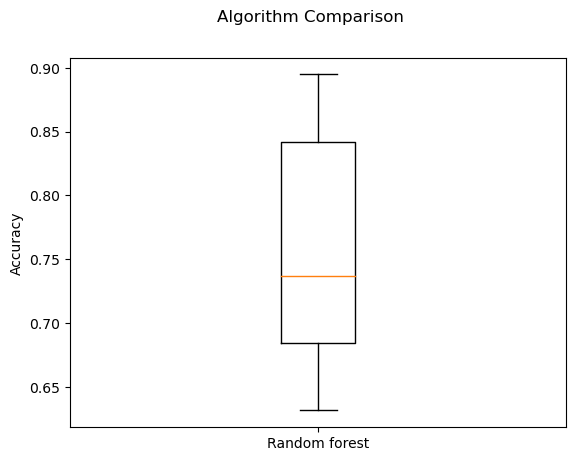

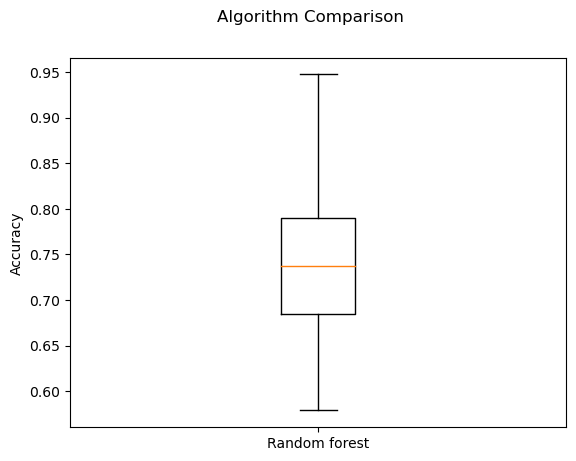

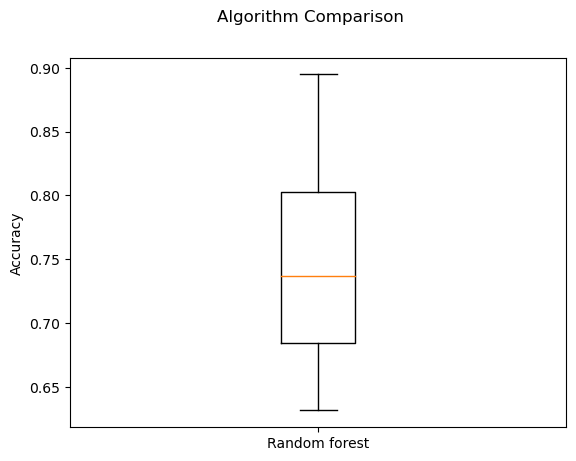

In [42]:
def main():
    x=1
    load_data(5)
    
    load_data(10)
    
    load_data(20)
    
    
if __name__ =="__main__":
    main()